# Data Preparation and Preprocessing

In [548]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import torch

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

from datetime import datetime

from torch import nn

In [549]:
df = pd.read_csv('survey_results_public.csv')
df

,Unnamed: 0,Country,EdLevel,YearsCodePro,Employment,Salary
0,2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
1,3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
2,8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
3,10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
4,11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0
...,...,...,...,...,...,...
37914,73116,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",16,"Employed, full-time",115000.0
37915,73118,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",57720.0
37916,73119,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",1,"Employed, full-time",70000.0
37917,73120,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",35192.0


In [550]:
# Drop kolom unamed
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
1,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
2,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
3,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37919 entries, 0 to 37918
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [552]:
# Ambil atribut non-null pada salary
df = df[df['Salary'].notnull()]
df.shape

(37919, 5)

In [553]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

## Preparation Employment Column

In [554]:
df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
I prefer not to say                                                                                27
Retired                                                                                            18
Employed, part-time;Retired                                                       

In [555]:
df = df[df['Employment'] != 'I prefer not to say']
df = df[~df['Employment'].str.contains('retired', case=False)]

df['Employment'].value_counts()

Employed, full-time                                                                             31382
Independent contractor, freelancer, or self-employed                                             2739
Employed, full-time;Independent contractor, freelancer, or self-employed                         2633
Employed, part-time                                                                               632
Independent contractor, freelancer, or self-employed;Employed, part-time                          207
Employed, full-time;Employed, part-time                                                           151
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      118
Name: Employment, dtype: int64

In [556]:
# Pisahkan ke baris baru dipisahkan dengan koma pada kolom Employment
df['Employment'] = df['Employment'].str.split(', ')
# Pisahkan ke baris baru
df = df.explode('Employment')
df['Employment'].value_counts()

Employed                            34916
full-time                           31382
freelancer                           5697
or self-employed                     5372
Independent contractor               2946
full-time;Independent contractor     2751
part-time                            1108
or self-employed;Employed             325
full-time;Employed                    151
Name: Employment, dtype: int64

In [557]:
# Pisahkan ke baris baru dipisahkan dengan titik koma pada kolom Employment
df['Employment'] = df['Employment'].str.split(';')
# Pisahkan ke baris baru
df = df.explode('Employment')
df['Employment'].value_counts()

Employed                  35392
full-time                 34284
Independent contractor     5697
freelancer                 5697
or self-employed           5697
part-time                  1108
Name: Employment, dtype: int64

In [558]:
# Menghilangkan kata or pada nilai or self-employed
df['Employment'] = df['Employment'].str.replace('or ', '')
df['Employment'].value_counts()

Employed                  35392
full-time                 34284
Independent contractor     5697
freelancer                 5697
self-employed              5697
part-time                  1108
Name: Employment, dtype: int64

In [559]:
# Drop kolom dengan nilai employment = employed
df = df[df['Employment'] != 'Employed']
df = df[df['Employment'] != 'Independent contractor']
df = df[df['Employment'] != 'self-employed']
df['Employment'].value_counts()

full-time     34284
freelancer     5697
part-time      1108
Name: Employment, dtype: int64

## Preparation Country Column

In [560]:
df['Country'].value_counts()

United States of America                                9118
Germany                                                 3088
United Kingdom of Great Britain and Northern Ireland    2746
India                                                   2352
Canada                                                  1600
                                                        ... 
Fiji                                                       1
Palau                                                      1
Monaco                                                     1
Saint Lucia                                                1
Seychelles                                                 1
Name: Country, Length: 159, dtype: int64

In [561]:
# Melakukan filter pada kolom Country jika nilai kurang dari cutoff
def convert_to_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories.value_counts())):
        if categories.value_counts().iloc[i] > cutoff:
            categorical_map[categories.value_counts().index[i]] = categories.value_counts().index[i]
        else:
            categorical_map[categories.value_counts().index[i]] = 'Other'
    return categories.map(categorical_map)

In [562]:
df['Country'] = convert_to_categories(df['Country'], 800)
df['Country'].value_counts()

Other                                                   14388
United States of America                                 9118
Germany                                                  3088
United Kingdom of Great Britain and Northern Ireland     2746
India                                                    2352
Canada                                                   1600
France                                                   1454
Brazil                                                   1438
Poland                                                   1158
Spain                                                    1059
Netherlands                                               955
Australia                                                 877
Italy                                                     856
Name: Country, dtype: int64

## Preparation YearsCodePro Column

In [563]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41089 entries, 0 to 37918
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       41089 non-null  object 
 1   EdLevel       41089 non-null  object 
 2   YearsCodePro  41089 non-null  int32  
 3   Employment    41089 non-null  object 
 4   Salary        41089 non-null  float64
dtypes: float64(1), int32(1), object(3)
memory usage: 1.7+ MB


In [564]:
df['YearsCodePro'].unique()

array([ 5, 17,  6,  2, 10,  4, 22, 20,  9, 14, 21, 15,  3, 25,  7,  8, 12,
       19,  1, 28, 24, 11, 23, 45,  0, 18, 40, 37, 46, 13, 32, 31, 39, 27,
       16, 26, 30, 34, 35, 29, 42, 38, 36, 43, 41, 44, 48, 33, 51, 50, 47,
       49])

## Preparation EdLevel Column

In [565]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          19425
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10639
Some college/university study without earning a degree                                 4956
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     1933
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1440
Associate degree (A.A., A.S., etc.)                                                    1392
Professional degree (JD, MD, etc.)                                                      674
Something else                                                                          389
Primary/elementary school                                                               241
Name: EdLevel, dtype: int64

In [566]:
def education_converter(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    elif 'Master’s degree' in x:
        return 'Master'
    elif 'Associate degree' in x:
        return 'Associate'
    elif 'Professional degree' in x:
        return 'Professional'
    elif 'Other doctoral degree' in x:
        return 'Doctoral'
    elif 'Secondary school' in x:
        return 'Secondary school'
    elif 'Primary' in x:
        return 'Primary school'
    else:
        return 'Other degree'
    
df['EdLevel'] = df['EdLevel'].apply(education_converter)
df['EdLevel'].value_counts()

Bachelor            19425
Master              10639
Other degree         5345
Secondary school     1933
Doctoral             1440
Associate            1392
Professional          674
Primary school        241
Name: EdLevel, dtype: int64

## Summary

In [567]:
df['Country'].value_counts()

Other                                                   14388
United States of America                                 9118
Germany                                                  3088
United Kingdom of Great Britain and Northern Ireland     2746
India                                                    2352
Canada                                                   1600
France                                                   1454
Brazil                                                   1438
Poland                                                   1158
Spain                                                    1059
Netherlands                                               955
Australia                                                 877
Italy                                                     856
Name: Country, dtype: int64

In [568]:
df['YearsCodePro'].value_counts()

3     3394
5     3373
4     3130
2     2969
10    2697
6     2641
7     2348
8     2249
1     1970
15    1458
12    1418
0     1409
9     1363
11    1149
20    1049
14     883
13     773
16     732
22     703
18     632
17     616
25     613
30     376
23     358
24     356
21     334
19     305
26     243
27     203
28     183
35     168
32     157
40      92
31      90
29      87
36      77
33      77
37      77
34      73
38      72
42      38
39      32
41      25
43      21
45      19
44      14
48       9
51       9
46       7
49       7
50       6
47       5
Name: YearsCodePro, dtype: int64

In [569]:
df['EdLevel'].value_counts()

Bachelor            19425
Master              10639
Other degree         5345
Secondary school     1933
Doctoral             1440
Associate            1392
Professional          674
Primary school        241
Name: EdLevel, dtype: int64

In [570]:
df['Employment'].value_counts()

full-time     34284
freelancer     5697
part-time      1108
Name: Employment, dtype: int64

In [571]:
df

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United Kingdom of Great Britain and Northern I...,Master,5,full-time,40205.0
1,Other,Bachelor,17,full-time,215232.0
2,Netherlands,Master,6,full-time,49056.0
3,United Kingdom of Great Britain and Northern I...,Bachelor,2,full-time,60307.0
4,United States of America,Bachelor,10,full-time,194400.0
...,...,...,...,...,...
37914,United States of America,Bachelor,16,full-time,115000.0
37915,Other,Bachelor,3,full-time,57720.0
37916,United States of America,Bachelor,1,full-time,70000.0
37917,Spain,Bachelor,2,full-time,35192.0


## Convert Data to New Data Transformation

In [572]:
# convert ke csv file
df.to_csv('survey_results_public_preprocessing.csv', index=False)

## Preprocessing Data

In [573]:
ed_encoder = LabelEncoder()
df['EdLevel'] = ed_encoder.fit_transform(np.ravel(df[['EdLevel']].values))
print(ed_encoder.classes_)
print(df['EdLevel'].unique())

['Associate' 'Bachelor' 'Doctoral' 'Master' 'Other degree'
 'Primary school' 'Professional' 'Secondary school']
[3 1 7 4 0 6 2 5]


In [574]:
country_encoder = LabelEncoder()
df['Country'] = country_encoder.fit_transform(np.ravel(df[['Country']].values))
print(country_encoder.classes_)
print(df['Country'].unique())

['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Poland' 'Spain'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
[11  8  7 12  6  2  4  9  3  1 10  5  0]


In [575]:
employment_encoder = LabelEncoder()
df['Employment'] = employment_encoder.fit_transform(np.ravel(df[['Employment']].values))
print(employment_encoder.classes_)
print(df['Employment'].unique())

['freelancer' 'full-time' 'part-time']
[1 0 2]


In [576]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,11,3,5,1,40205.0
1,8,1,17,1,215232.0
2,7,3,6,1,49056.0
3,11,1,2,1,60307.0
4,12,1,10,1,194400.0


# Data Modelling

In [577]:
X = df.drop('Salary', axis=1)
y = df['Salary']

In [578]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Decission Tree

In [581]:
dt_model = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12]
}

dt_gs = GridSearchCV(dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
dt_gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='neg_mean_absolute_error')>

In [582]:
dt_gs.fit(X_train, y_train)
dt_regressor = dt_gs.best_estimator_
dt_regressor

DecisionTreeRegressor(max_depth=6)

In [583]:
dt_regressor.fit(X_train.values, y_train)

DecisionTreeRegressor(max_depth=6)

In [584]:
y_pred = dt_regressor.predict(X_test.values)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  179387.46766840524
RMSE:  941712.5986583227


## Random Forest

In [585]:
rf_model = RandomForestRegressor()

param_grid = {
    'max_depth': [None, 2, 4, 6, 8, 10, 12]
}

rf_gs = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
rf_gs.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='neg_mean_absolute_error')>

In [586]:
rf_gs.fit(X_train, y_train)
rf_regressor = rf_gs.best_estimator_
rf_regressor

RandomForestRegressor(max_depth=6)

In [587]:
rf_regressor.fit(X_train.values, y_train)

RandomForestRegressor(max_depth=6)

In [588]:
y_pred = rf_regressor.predict(X_test.values)
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE:  176382.37486853788
RMSE:  802709.455560532


## Upload to pickle

In [618]:
# Memasukkan data data yang diperlukan dan di assign ke dalam model.pkl
data = {
    'DecissionTree' : dt_regressor,
    'RandomForest' : rf_regressor,
    'country_encoder' : country_encoder,
    'ed_encoder' : ed_encoder,
    'employment_encoder' : employment_encoder,
    'n_input' : X_train.shape[1]
}

with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

## Neural Network

In [590]:
# Pengubahan data menjadi tensor
X_train_pt = torch.from_numpy(X_train.to_numpy()).float()
X_test_pt = torch.from_numpy(X_test.to_numpy()).float()
y_train_pt = torch.from_numpy(y_train.to_numpy()).float().view(-1, 1)
y_test_pt = torch.from_numpy(y_test.to_numpy()).float().view(-1, 1)
X_pt = torch.from_numpy(X.to_numpy()).float()
y_pt = torch.from_numpy(y.to_numpy()).float().view(-1, 1)

In [591]:
print(X_train_pt.shape)
print(X_test_pt.shape)
print(y_train_pt.shape)
print(y_test_pt.shape)
print(X_pt.shape)
print(y_pt.shape)

torch.Size([32871, 4])
torch.Size([8218, 4])
torch.Size([32871, 1])
torch.Size([8218, 1])
torch.Size([41089, 4])
torch.Size([41089, 1])


In [592]:
# Ukuran input layer
input_size = X_train_pt.shape[1]
print(input_size)

4


In [593]:
# Membuat class SalaryPredict dengan menggunakan nn.Module
class SalaryPredict(nn.Module):
    def __init__(self, n_input_featrues):
        super().__init__()
        self.l1 = nn.Linear(n_input_featrues, 128)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.l3 = nn.Linear(64, 32)
        self.relu3 = nn.LeakyReLU()
        self.l4 = nn.Linear(32, 16)
        self.relu4 = nn.LeakyReLU()
        self.l5 = nn.Linear(16, 8)
        self.relu5 = nn.LeakyReLU()
        self.l6 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(p=0.1)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu1(x)
        x = self.l2(x)
        x = self.relu2(x)
        x = self.l3(x)
        x = self.relu3(x)
        x = self.l4(x)
        x = self.relu4(x)
        x = self.l5(x)
        x = self.relu5(x)
        x = self.l6(x)
        x = self.dropout(x)
        return x


In [594]:
# Menentukan perangkat yang digunakan untuk komputasi
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [595]:
# Definisikan model
model = SalaryPredict(input_size)

In [596]:
# Menghitung MSE
criterion = nn.MSELoss()

In [597]:
# Optimisasi parameter
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [598]:
# Inisialisasi epoch
epochs = 1000

In [599]:
# Training model dan save model
time_start = datetime.now()
loss_curve = []
start_time = datetime.now()

for epoch in range(epochs+1):
    y_pred = model(X_pt).to(device)
    loss = criterion(y_pred, y_pt)
    loss_curve.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'{datetime.now() - time_start} | Epoch: {epoch} Loss: {loss.item()}')

0:00:01.507361 | Epoch: 0 Loss: 595257524224.0
0:00:16.285471 | Epoch: 10 Loss: 595257262080.0
0:00:31.221100 | Epoch: 20 Loss: 595256475648.0
0:00:46.789845 | Epoch: 30 Loss: 595254378496.0
0:01:01.940762 | Epoch: 40 Loss: 595248742400.0
0:01:17.234516 | Epoch: 50 Loss: 595234324480.0
0:01:30.559343 | Epoch: 60 Loss: 595200638976.0
0:01:45.053134 | Epoch: 70 Loss: 595124158464.0
0:01:58.963824 | Epoch: 80 Loss: 594958680064.0
0:02:13.842447 | Epoch: 90 Loss: 594618023936.0
0:02:30.990290 | Epoch: 100 Loss: 593976885248.0
0:02:46.975846 | Epoch: 110 Loss: 592851763200.0
0:03:01.812117 | Epoch: 120 Loss: 590948859904.0
0:03:16.745076 | Epoch: 130 Loss: 587703779328.0
0:03:32.824672 | Epoch: 140 Loss: 583156367360.0
0:03:46.787274 | Epoch: 150 Loss: 576958889984.0
0:04:00.860061 | Epoch: 160 Loss: 571359297536.0
0:04:15.215878 | Epoch: 170 Loss: 567477796864.0
0:04:29.745785 | Epoch: 180 Loss: 567054958592.0
0:04:44.242670 | Epoch: 190 Loss: 567383031808.0
0:04:59.030932 | Epoch: 200 Los

In [600]:
torch.save({
    'Model' : model.state_dict(),
    'country_encoder' : country_encoder,
    'ed_encoder' : ed_encoder,
    'employment_encoder' : employment_encoder
}, 'model.pt')

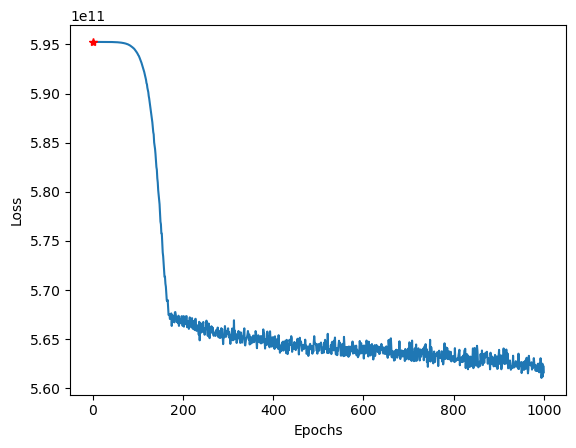

In [601]:
plt.plot(range(epoch+1), loss_curve)
plt.plot(range(epochs+1)[::3000], loss_curve[::3000], '*r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [602]:
model = SalaryPredict(input_size)
loader = torch.load('model.pt')
model.load_state_dict(loader['Model'])
encoder_country = loader['country_encoder']
encoder_ed = loader['ed_encoder']
encoder_employment = loader['employment_encoder']

In [603]:
print(encoder_country.classes_)
print(encoder_ed.classes_)
print(encoder_employment.classes_)

['Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Other' 'Poland' 'Spain'
 'United Kingdom of Great Britain and Northern Ireland'
 'United States of America']
['Associate' 'Bachelor' 'Doctoral' 'Master' 'Other degree'
 'Primary school' 'Professional' 'Secondary school']
['freelancer' 'full-time' 'part-time']


In [604]:
x = np.array([['Brazil', 'Master', 'part-time', 20]])
x

array([['Brazil', 'Master', 'part-time', '20']], dtype='<U11')

In [605]:
x[:, 0] = encoder_country.transform(x[:, 0])
x[:, 1] = encoder_ed.transform(x[:, 1])
x[:, 2] = encoder_employment.transform(x[:, 2])
x = x.astype(float)
x

array([[ 1.,  3.,  2., 20.]])

## Load pickle

In [619]:
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)
    
dt_regressor = data['DecissionTree']
rf_regressor = data['RandomForest']

In [620]:
y_pred_dt = dt_regressor.predict(x)[0]
y_pred_rf = rf_regressor.predict(x)[0]
y_pred_nn = model(torch.from_numpy(x.astype(float)).float()).item()

In [621]:
print(f'Decission Tree: {y_pred_dt}')
print(f'Random Forest: {y_pred_rf}')
print(f'Neural Network: {y_pred_nn}')

Decission Tree: 29715.06004140787
Random Forest: 33312.408374349754
Neural Network: 229269.9375
